#Classifier for the German Traffic Signs dataset
ABOUT THE DATASET


The dataset contains traffic sign boards from the streets captured into image files. There are 43 unique classes in total. The images are of shape (30,30,3).


In [9]:
import urllib
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt

This function downloads and extracts the dataset to the directory:

In [10]:
def download_and_extract_data():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
    urllib.request.urlretrieve(url, 'germantrafficsigns.zip')
    with zipfile.ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
        zip_ref.extractall()

In [11]:
download_and_extract_data()

This function normalizes images:

In [12]:
def preprocess(image, label):
    image = image / 255
    return image, label

Load the data, normalize and resize the images, split it into train and validation sets:

In [14]:
BATCH_SIZE = 32
IMG_SIZE = 30

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='train/',
    label_mode='categorical',
    image_size=  (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='validation/',
    label_mode='categorical',
    image_size=  (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE)

train_ds = train_ds.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(
        tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

Found 31367 files belonging to 43 classes.
Found 7842 files belonging to 43 classes.


define the model and compile:

In [15]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(30, 30, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(43, activation=tf.nn.softmax)
        ])

model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy']
              )

train the model:

In [21]:
history = model.fit(
            train_ds,
            epochs=5,
            validation_data=val_ds
            )

Epoch 1/5
981/981 [==============================] - 69s 71ms/step - loss: 0.0634 - accuracy: 0.9822 - val_loss: 0.1779 - val_accuracy: 0.9564
Epoch 2/5
981/981 [==============================] - 70s 71ms/step - loss: 0.0498 - accuracy: 0.9863 - val_loss: 0.1597 - val_accuracy: 0.9649
Epoch 3/5
981/981 [==============================] - 68s 69ms/step - loss: 0.0447 - accuracy: 0.9872 - val_loss: 0.1534 - val_accuracy: 0.9686
Epoch 4/5
981/981 [==============================] - 66s 67ms/step - loss: 0.0352 - accuracy: 0.9904 - val_loss: 0.1933 - val_accuracy: 0.9619
Epoch 5/5
981/981 [==============================] - 67s 68ms/step - loss: 0.0369 - accuracy: 0.9896 - val_loss: 0.1699 - val_accuracy: 0.9690


Plot results:

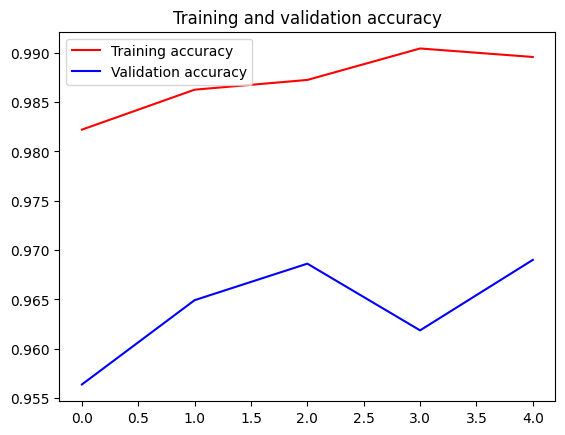

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)


plt.show()